<a href='https://srihar1-raman.github.io/srihari.github.io/'><img src='https://srihar1-raman.github.io/srihari.github.io/img/devjane.png'></a>

In [33]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv("../DATA/hearing_test.csv")
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [36]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [37]:
df.test_result.value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='count'>

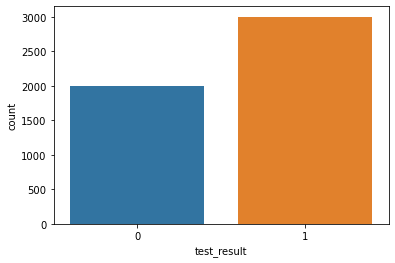

In [38]:
sns.countplot(x = "test_result", data = df)

<AxesSubplot:xlabel='test_result', ylabel='age'>

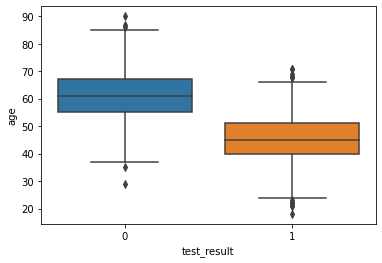

In [39]:
sns.boxplot(x = "test_result", y = "age", data = df)

<AxesSubplot:xlabel='physical_score', ylabel='age'>

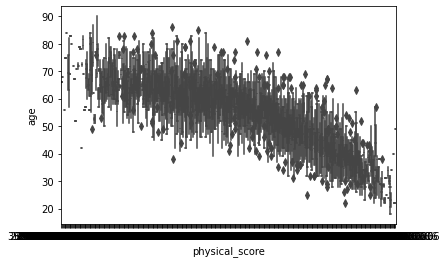

In [40]:
sns.boxplot(x = "physical_score", y = "age", data = df)

<AxesSubplot:xlabel='age', ylabel='physical_score'>

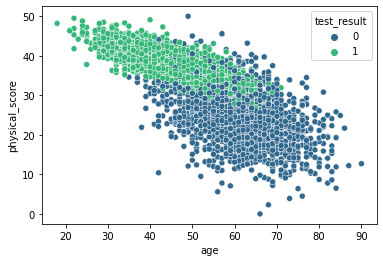

In [41]:
sns.scatterplot(y = "physical_score", x = "age", data = df, hue = "test_result", palette = "viridis")

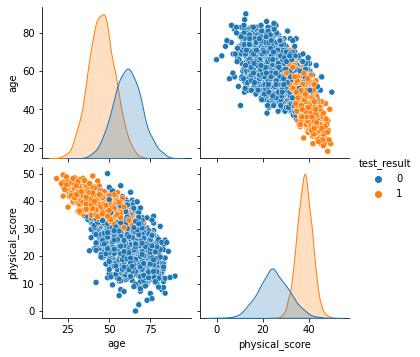

In [42]:
sns.pairplot(df, hue = "test_result")

<AxesSubplot:>

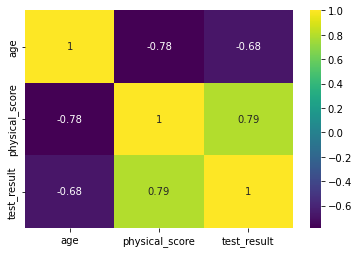

In [43]:
sns.heatmap(df.corr(), cmap = "viridis", annot = True)

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

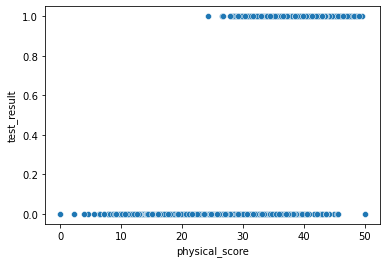

In [44]:
sns.scatterplot(x = "physical_score", y = "test_result", data = df)

<AxesSubplot:xlabel='age', ylabel='test_result'>

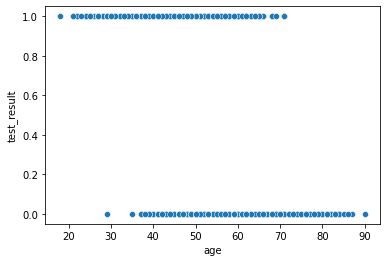

In [45]:
sns.scatterplot(x = "age", y = "test_result", data = df)

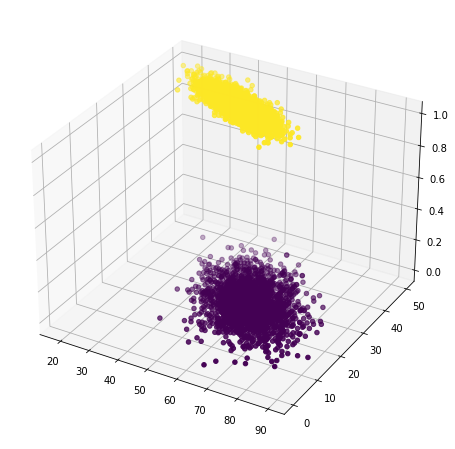

In [46]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(df["age"], df["physical_score"], df["test_result"], c = df["test_result"])

In [47]:
X = df.drop("test_result", axis = 1)
y = df["test_result"]

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [50]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## LOGISTICS REGRESSION MODEL

In [1]:
from sklearn.linear_model import LogisticRegression

In [2]:
log_model = LogisticRegression()

In [3]:
log_model.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [54]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

### Model Perf.

In [55]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [56]:
y_pred = log_model.predict(X_test)

In [57]:
accuracy_score(y_test, y_pred)

0.93

In [58]:
confusion_matrix(y_test, y_pred)

array([[172,  21],
       [ 14, 293]])

/Users/user/Downloads/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


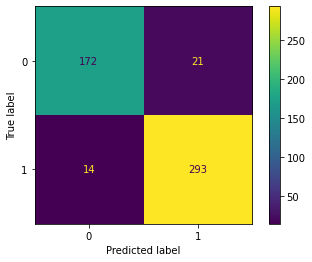

In [59]:
plot_confusion_matrix(log_model, X_test, y_test)

/Users/user/Downloads/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


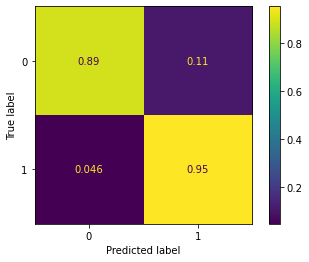

In [61]:
plot_confusion_matrix(log_model,X_test,y_test,normalize='true')

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [70]:
# they used scaled_X_train as the train variable in scaling section of the code

# X_train.iloc[0]

In [67]:
y_train.iloc[0]

1

In [72]:
# log_model.predict_proba(X_train.iloc[0].values.reshape(1, -1))

In [74]:
# log_model.predict(X_train.iloc[0].values.reshape(1, -1))

## Curves and AUC

In [75]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

/Users/user/Downloads/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


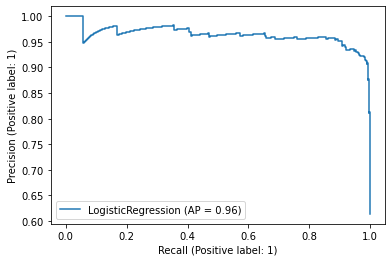

In [77]:
plot_precision_recall_curve(log_model,X_test,y_test)

/Users/user/Downloads/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


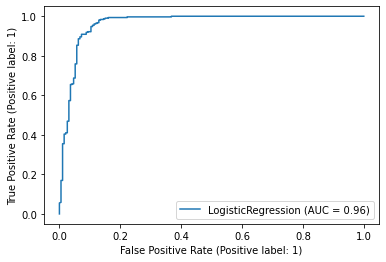

In [79]:
plot_roc_curve(log_model,X_test,y_test)